<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Fermi's_Golden_Rule_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authored by Onri Jay Benally (2025)

Open Access (CC-BY-4.0)

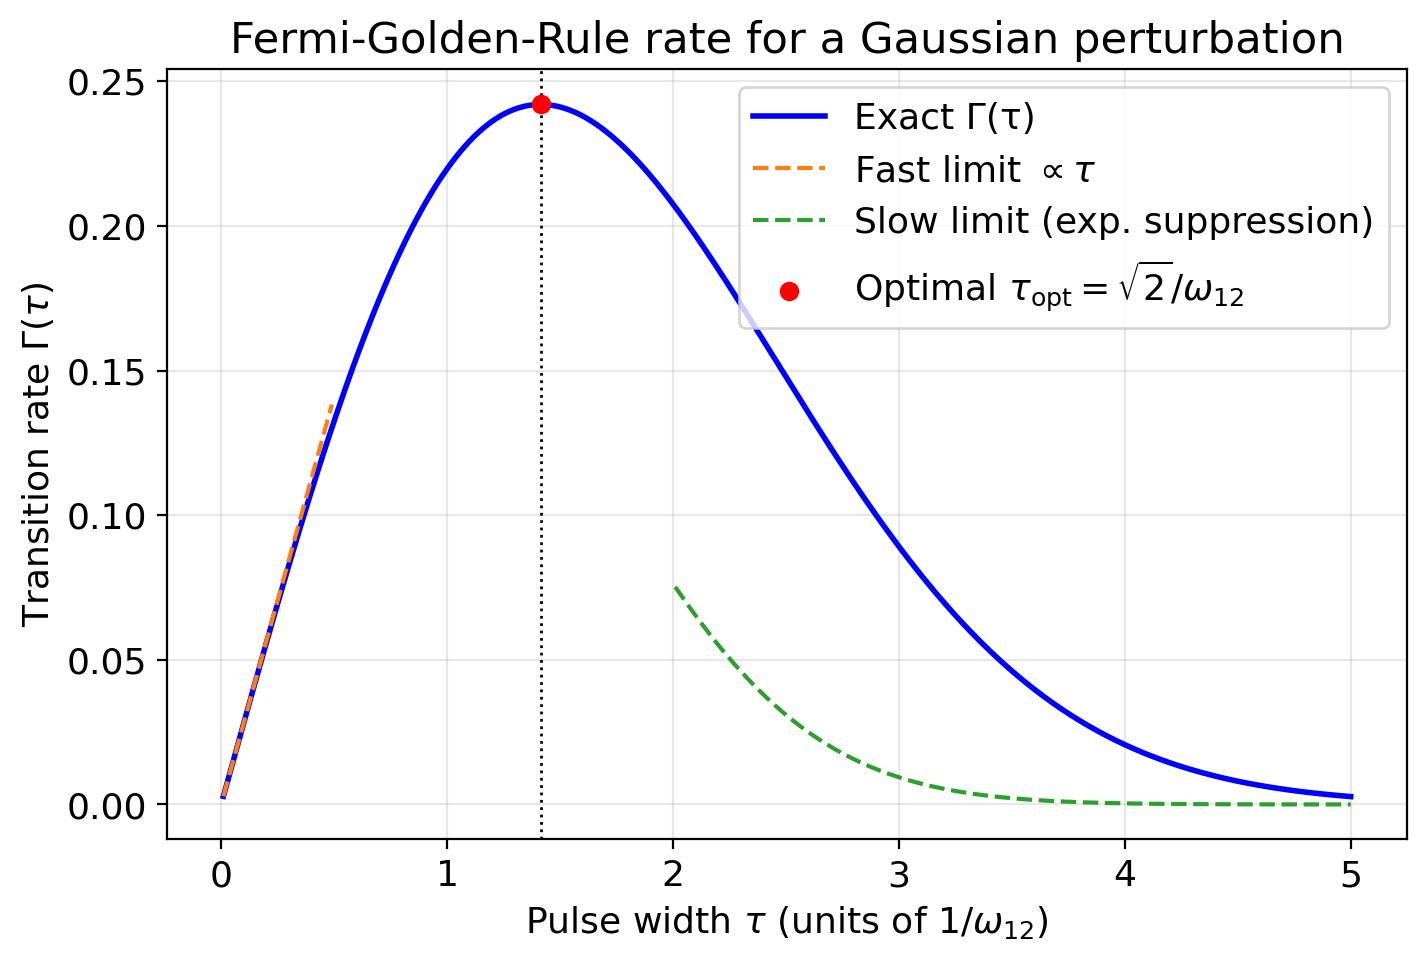

In [23]:
"""Plot of the Fermi‑Golden‑Rule (FGR) rate versus pulse width τ.

The script visualises the exact transition rate for a Gaussian
perturbation together with its fast‑pulse (linear) and slow‑pulse
(exponential) limits.  The figure is rendered at 200 dpi for high‑resolution
output.
"""

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------
# Plot style (high‑resolution figure)
# -----------------------------------------------------------------
plt.rcParams["figure.dpi"] = 200

# -----------------------------------------------------------------
# Physical constants (dimensionless demo values)
# -----------------------------------------------------------------
HBAR = 1.0          # ℏ (reduced Planck constant)
V12 = 1.0           # coupling strength |V₁₂|
OMEGA_12 = 1.0      # Bohr transition frequency ω₁₂


def gamma_exact(tau: float) -> float:
    """Exact FGR rate Γ(τ) for a Gaussian perturbation.

    The analytic expression is

        Γ(τ) = (ℏ/(2√π))·|V₁₂|²·τ·exp[−(ω₁₂·τ)²/4].

    Args:
        tau: Pulse width expressed in units of 1/ω₁₂.

    Returns:
        The transition rate Γ(τ).
    """
    prefactor = HBAR / (2 * np.sqrt(np.pi)) * V12**2
    return prefactor * tau * np.exp(-(OMEGA_12 * tau) ** 2 / 4.0)


def gamma_fast(tau: float) -> float:
    """Fast‑pulse limit (τ ≪ 1/ω₁₂): Γ ≈ prefactor·τ.

    Args:
        tau: Pulse width expressed in units of 1/ω₁₂.

    Returns:
        Rate for the fast‑pulse approximation.
    """
    prefactor = HBAR / (2 * np.sqrt(np.pi)) * V12**2
    return prefactor * tau


def gamma_slow(tau: float) -> float:
    """Slow‑pulse limit (τ ≫ 1/ω₁₂).

    The exponential tail is retained while the explicit τ factor in the
    prefactor is omitted:

        Γ(τ) ≈ prefactor·exp[−(ω₁₂·τ)²/4].

    Args:
        tau: Pulse width expressed in units of 1/ω₁₂.

    Returns:
        Rate for the slow‑pulse illustration.
    """
    prefactor = HBAR / (2 * np.sqrt(np.pi)) * V12**2
    return prefactor * np.exp(-(OMEGA_12 * tau) ** 2 / 4.0)


def main() -> None:
    """Generate data, compute rates, and plot the figure."""
    # -------------------------------------------------------------
    # τ grid
    # -------------------------------------------------------------
    tau_min = 0.01
    tau_max = 5.0
    tau_vals = np.linspace(tau_min, tau_max, 500)

    # -------------------------------------------------------------
    # Compute curves
    # -------------------------------------------------------------
    exact_vals = gamma_exact(tau_vals)
    fast_vals = gamma_fast(tau_vals)                 # linear guide
    slow_vals = gamma_exact(tau_vals) * np.exp(
        -(OMEGA_12 * tau_vals) ** 2 / 4
    )

    # -------------------------------------------------------------
    # Optimal pulse width (identical for both limits)
    # -------------------------------------------------------------
    tau_opt = np.sqrt(2) / OMEGA_12
    rate_opt = gamma_exact(tau_opt)

    # -------------------------------------------------------------
    # Plot
    # -------------------------------------------------------------
    plt.plot(
        tau_vals,
        exact_vals,
        label="Exact Γ(τ)",
        color="blue",
        lw=2,
    )

    mask_fast = tau_vals < 0.5 / OMEGA_12
    plt.plot(
        tau_vals[mask_fast],
        fast_vals[mask_fast],
        "--",
        label=r"Fast limit $\propto\tau$",
        color="tab:orange",
        lw=1.5,
    )

    mask_slow = tau_vals > 2 / OMEGA_12
    plt.plot(
        tau_vals[mask_slow],
        slow_vals[mask_slow],
        "--",
        label="Slow limit (exp. suppression)",
        color="tab:green",
        lw=1.5,
    )

    plt.axvline(tau_opt, color="k", ls=":", lw=1)
    plt.scatter(
        [tau_opt],
        [rate_opt],
        color="red",
        zorder=5,
        label=r"Optimal $\tau_{\rm opt}=\sqrt{2}/\omega_{12}$",
    )

    plt.xlabel(r"Pulse width $\tau$ (units of $1/\omega_{12}$)")
    plt.ylabel(r"Transition rate $\Gamma(\tau)$")
    plt.title("Fermi‑Golden‑Rule rate for a Gaussian perturbation")
    plt.legend()
    plt.grid(alpha=0.3)

    # Optional: uncomment to view a logarithmic y‑scale
    # plt.yscale('log')
    # plt.ylim(bottom=1e-4)

    plt.show()


if __name__ == "__main__":
    main()


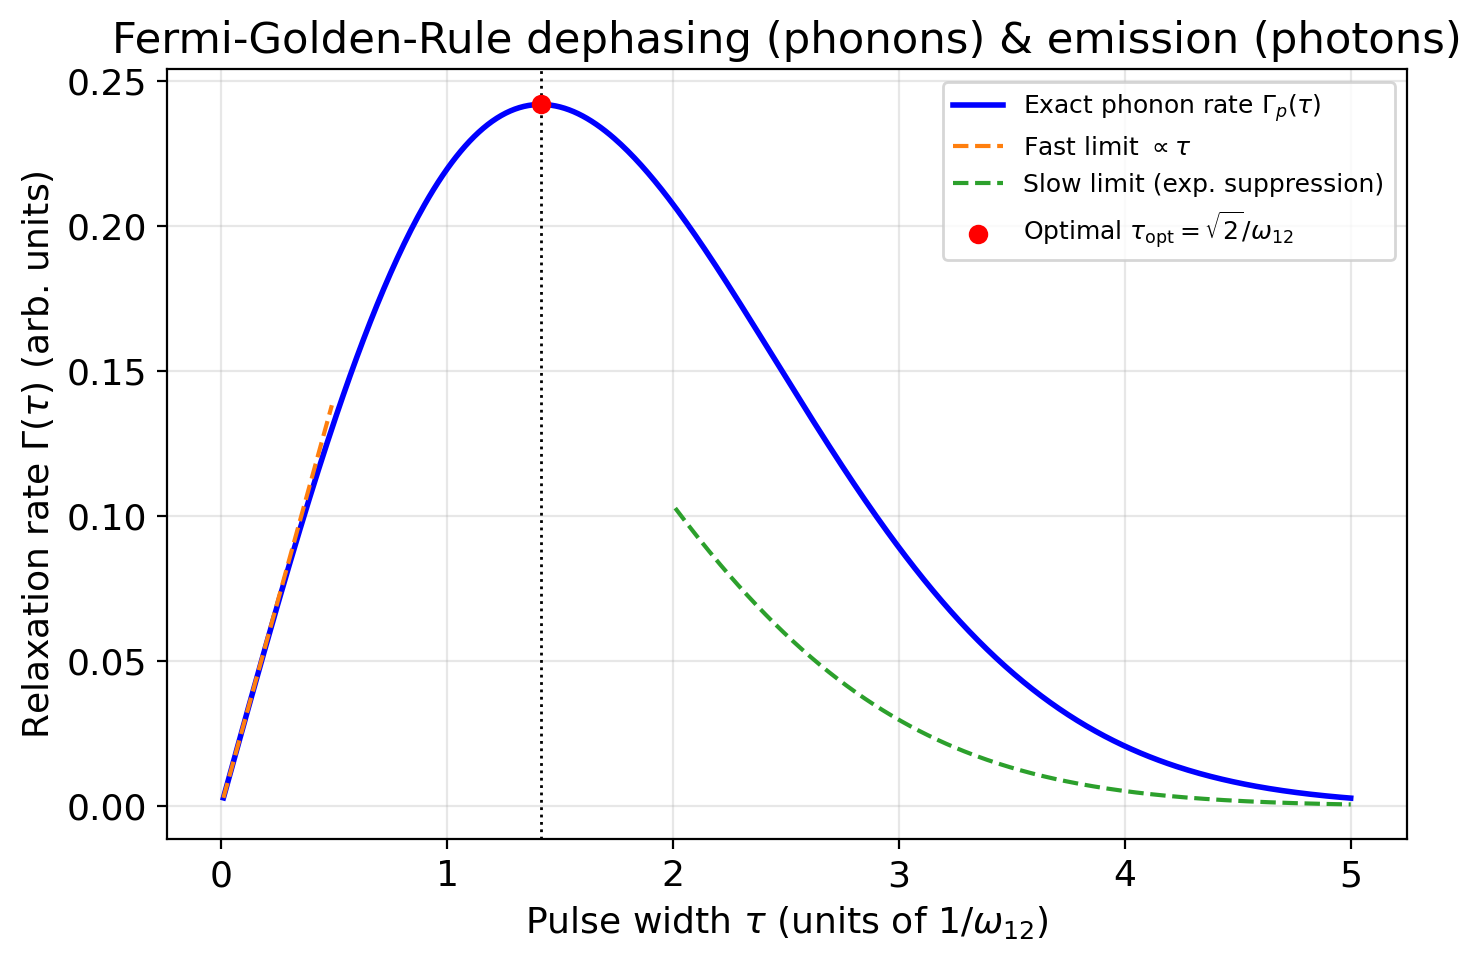

In [22]:
"""Plot Fermi‑Golden‑Rule (FGR) rates for phonons and photons.

The script evaluates the exact rate as well as the fast‑pulse (linear)
and slow‑pulse (exponential) limits for a Gaussian perturbation.
Two curves are drawn on a single set of axes (one for phonon
dephasing, one for photon emission) and the figure is rendered at
200 dpi for high‑resolution output.
"""

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------
# Plot style
# -----------------------------------------------------------------
plt.rcParams["figure.dpi"] = 200          # high‑resolution output

# -----------------------------------------------------------------
# Physical constants (dimensionless demo values)
# -----------------------------------------------------------------
HBAR = 1.0          # ℏ (reduced Planck constant)
V12 = 1.0           # coupling strength |V₁₂|
OMEGA_12 = 1.0      # Bohr transition frequency ω₁₂


def get_prefactor() -> float:
    """Return the constant front factor ℏ/(2√π)·|V₁₂|²."""
    return HBAR / (2 * np.sqrt(np.pi)) * V12**2


# -----------------------------------------------------------------
# Phonon rates (dephasing)
# -----------------------------------------------------------------
def gamma_exact_ph(tau: float) -> float:
    """Exact phonon dephasing rate Γₚ(τ) for a Gaussian perturbation.

    Formula:
        Γₚ(τ) = (ℏ/(2√π))·|V₁₂|²·τ·exp[−(ω₁₂·τ)²/4].

    Args:
        tau: Pulse width (in units of 1/ω₁₂).

    Returns:
        Phonon dephasing rate Γₚ(τ).
    """
    pref = get_prefactor()
    return pref * tau * np.exp(-(OMEGA_12 * tau) ** 2 / 4.0)


def gamma_fast_ph(tau: float) -> float:
    """Fast‑pulse limit (τ ≪ 1/ω₁₂): Γₚ ≃ prefactor·τ."""
    pref = get_prefactor()
    return pref * tau


def gamma_slow_ph(tau: float) -> float:
    """Slow‑pulse limit (τ ≫ 1/ω₁₂): Γₚ ≃ prefactor·exp[−(ω₁₂·τ)²/4]."""
    pref = get_prefactor()
    return pref * np.exp(-(OMEGA_12 * tau) ** 2 / 4.0)


# -----------------------------------------------------------------
# Photon rates (spontaneous emission)
# -----------------------------------------------------------------
def gamma_exact_photon(tau: float) -> float:
    """Exact photon‑emission rate Γ(τ) for a Gaussian perturbation.

    The functional form is identical to the phonon case; only the
    physical interpretation differs.

    Args:
        tau: Pulse width (in units of 1/ω₁₂).

    Returns:
        Photon emission rate Γ(τ).
    """
    pref = get_prefactor()
    return pref * tau * np.exp(-(OMEGA_12 * tau) ** 2 / 4.0)


def photon_fast(tau: float) -> float:
    """Fast‑pulse limit for photons (linear in τ)."""
    pref = get_prefactor()
    return pref * tau


def photon_slow(tau: float) -> float:
    """Slow‑pulse limit for photons (exponential tail only)."""
    pref = get_prefactor()
    return pref * np.exp(-(OMEGA_12 * tau) ** 2 / 4.0)


def main() -> None:
    """Generate the plot and display it."""
    # -------------------------------------------------------------
    # τ grid
    # -------------------------------------------------------------
    tau_min = 0.01
    tau_max = 5.0
    tau_vals = np.linspace(tau_min, tau_max, 500)

    # -------------------------------------------------------------
    # Compute phonon curves
    # -------------------------------------------------------------
    gamma_ph_exact = gamma_exact_ph(tau_vals)
    gamma_ph_fast = gamma_fast_ph(tau_vals)
    gamma_ph_slow = gamma_slow_ph(tau_vals)

    # -------------------------------------------------------------
    # Photon curves (shown only as guides – same shape as phonons)
    # -------------------------------------------------------------
    gamma_photon_fast = photon_fast(tau_vals)
    gamma_photon_slow = photon_slow(tau_vals)

    # -------------------------------------------------------------
    # Optimal pulse width (identical for both processes)
    # -------------------------------------------------------------
    tau_opt = np.sqrt(2) / OMEGA_12
    gamma_opt = gamma_exact_ph(tau_opt)

    # -------------------------------------------------------------
    # Plot
    # -------------------------------------------------------------
    plt.figure(figsize=(8, 5))

    # Exact phonon curve
    plt.plot(
        tau_vals,
        gamma_ph_exact,
        label=r"Exact phonon rate $\Gamma_{p}(\tau)$",
        color="blue",
        lw=2,
    )

    # Fast‑pulse guide (phonons)
    mask_fast = tau_vals < 0.5 / OMEGA_12
    plt.plot(
        tau_vals[mask_fast],
        gamma_ph_fast[mask_fast],
        "--",
        label=r"Fast limit $\propto\tau$",
        color="tab:orange",
        lw=1.5,
    )

    # Slow‑pulse guide (phonons)
    mask_slow = tau_vals > 2 / OMEGA_12
    plt.plot(
        tau_vals[mask_slow],
        gamma_ph_slow[mask_slow],
        "--",
        label="Slow limit (exp. suppression)",
        color="tab:green",
        lw=1.5,
    )

    # Optimal‑width marker (common to both processes)
    plt.axvline(tau_opt, color="k", ls=":", lw=1)
    plt.scatter(
        [tau_opt],
        [gamma_opt],
        color="red",
        zorder=5,
        label=r"Optimal $\tau_{\rm opt}=\sqrt{2}/\omega_{12}$",
    )

    # Axis cosmetics
    plt.xlabel(r"Pulse width $\tau$ (units of $1/\omega_{12}$)")
    plt.ylabel(r"Relaxation rate $\Gamma(\tau)$ (arb. units)")
    plt.title(
        "Fermi‑Golden‑Rule dephasing (phonons) & emission (photons)"
    )
    plt.legend(fontsize=9, loc="upper right")
    plt.grid(alpha=0.3)

    # OPTIONAL: uncomment for a logarithmic y‑scale
    # plt.yscale('log')
    # plt.ylim(bottom=1e-4)

    plt.show()


if __name__ == "__main__":
    main()


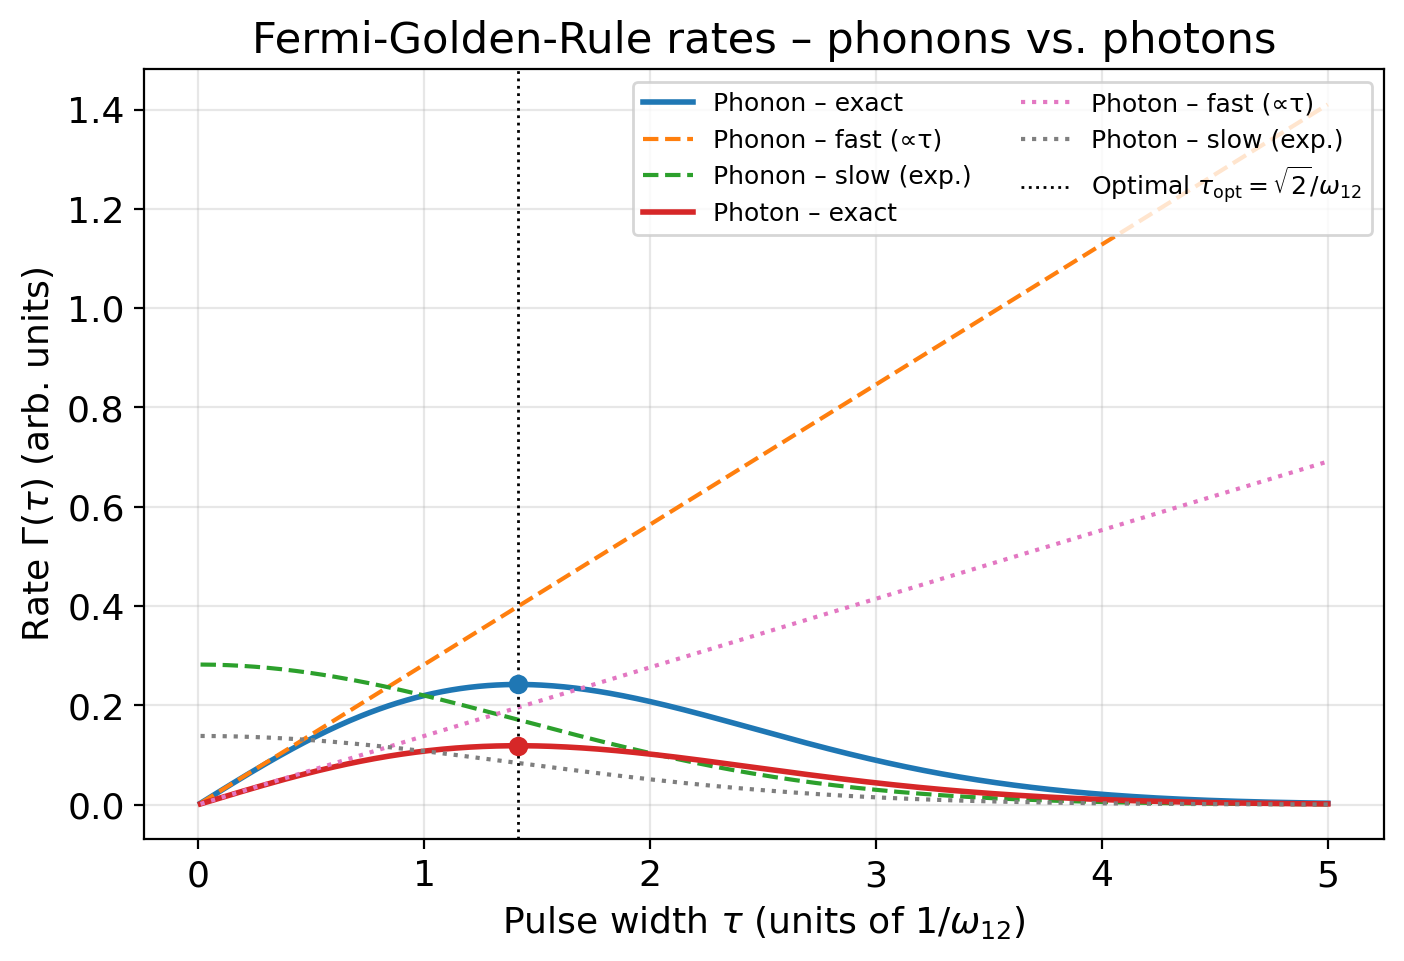

In [18]:
"""Overlay plot of Fermi‑Golden‑Rule (FGR) rates for phonons and photons.

Both the phonon dephasing rate and the photon‑emission rate obey the same
Gaussian‑pulse FGR expression.  The script draws the exact curve, the
fast‑pulse linear limit and the slow‑pulse exponential tail for each
process on a single set of axes.
"""

import numpy as np
import matplotlib.pyplot as plt

# High‑resolution output (200 dpi) -----------------------------------------
plt.rcParams["figure.dpi"] = 200

# ----------------------------------------------------------------------
# Physical constants (dimensionless demo values)
# ----------------------------------------------------------------------
hbar = 1.0          # ℏ (reduced Planck constant)
omega12 = 1.0       # Bohr transition frequency ω₁₂

# Separate coupling strengths for the two processes
V12_phonon = 1.0   # phonon matrix element |V₁₂|
V12_photon = 0.7   # photon matrix element |V₁₂| (different magnitude)


def prefactor(V: float) -> float:
    """Return the common front factor ℏ/(2√π)·|V|²."""
    return hbar / (2 * np.sqrt(np.pi)) * V**2


def gamma_exact(tau: float, V: float) -> float:
    """
    Exact FGR rate Γ(τ) for a Gaussian perturbation.

    Args:
        tau: Pulse width (in units of 1/ω₁₂).
        V:   Coupling strength for the process.

    Returns:
        The rate Γ(τ).
    """
    pref = prefactor(V)
    return pref * tau * np.exp(-(omega12 * tau) ** 2 / 4.0)


def gamma_fast(tau: float, V: float) -> float:
    """Fast‑pulse limit (linear in τ)."""
    return prefactor(V) * tau


def gamma_slow(tau: float, V: float) -> float:
    """Slow‑pulse limit – exponential tail only."""
    return prefactor(V) * np.exp(-(omega12 * tau) ** 2 / 4.0)


def main() -> None:
    """Generate the overlay plot for phonon and photon rates."""
    # --------------------------------------------------------------
    # τ grid and optimal width
    # --------------------------------------------------------------
    tau_vals = np.linspace(0.01, 5.0, 500)
    tau_opt = np.sqrt(2) / omega12  # ≈ √2 / ω₁₂

    # --------------------------------------------------------------
    # Compute rates for each process
    # --------------------------------------------------------------
    # Phonon
    gamma_ph_exact = gamma_exact(tau_vals, V12_phonon)
    gamma_ph_fast = gamma_fast(tau_vals, V12_phonon)
    gamma_ph_slow = gamma_slow(tau_vals, V12_phonon)

    # Photon
    gamma_pt_exact = gamma_exact(tau_vals, V12_photon)
    gamma_pt_fast = gamma_fast(tau_vals, V12_photon)
    gamma_pt_slow = gamma_slow(tau_vals, V12_photon)

    # --------------------------------------------------------------
    # Plot
    # --------------------------------------------------------------
    plt.figure(figsize=(8, 5))

    # Phonon curves (solid lines)
    plt.plot(tau_vals, gamma_ph_exact,
             label="Phonon – exact",
             color="tab:blue",
             lw=2)
    plt.plot(tau_vals, gamma_ph_fast,
             "--",
             label="Phonon – fast (∝τ)",
             color="tab:orange",
             lw=1.5)
    plt.plot(tau_vals, gamma_ph_slow,
             "--",
             label="Phonon – slow (exp.)",
             color="tab:green",
             lw=1.5)

    # Photon curves (dotted lines)
    plt.plot(tau_vals, gamma_pt_exact,
             label="Photon – exact",
             color="tab:red",
             lw=2)
    plt.plot(tau_vals, gamma_pt_fast,
             ":",
             label="Photon – fast (∝τ)",
             color="tab:pink",
             lw=1.5)
    plt.plot(tau_vals, gamma_pt_slow,
             ":",
             label="Photon – slow (exp.)",
             color="tab:gray",
             lw=1.5)

    # Optimal‑width markers (identical τ_opt for both processes)
    plt.axvline(tau_opt,
                color="k",
                ls=":",
                lw=1,
                label=r"Optimal $\tau_{\rm opt}=\sqrt{2}/\omega_{12}$")
    plt.scatter([tau_opt],
                [gamma_exact(tau_opt, V12_phonon)],
                color="tab:blue",
                zorder=5)
    plt.scatter([tau_opt],
                [gamma_exact(tau_opt, V12_photon)],
                color="tab:red",
                zorder=5)

    # Axis cosmetics
    plt.xlabel(r"Pulse width $\tau$ (units of $1/\omega_{12}$)")
    plt.ylabel(r"Rate $\Gamma(\tau)$ (arb. units)")
    plt.title("Fermi‑Golden‑Rule rates – phonons vs. photons")
    plt.legend(fontsize=9, ncol=2, loc="upper right")
    plt.grid(alpha=0.3)

    # Optional: uncomment for a logarithmic y‑axis
    # plt.yscale("log")
    # plt.ylim(bottom=1e-4)

    plt.show()


if __name__ == "__main__":
    main()


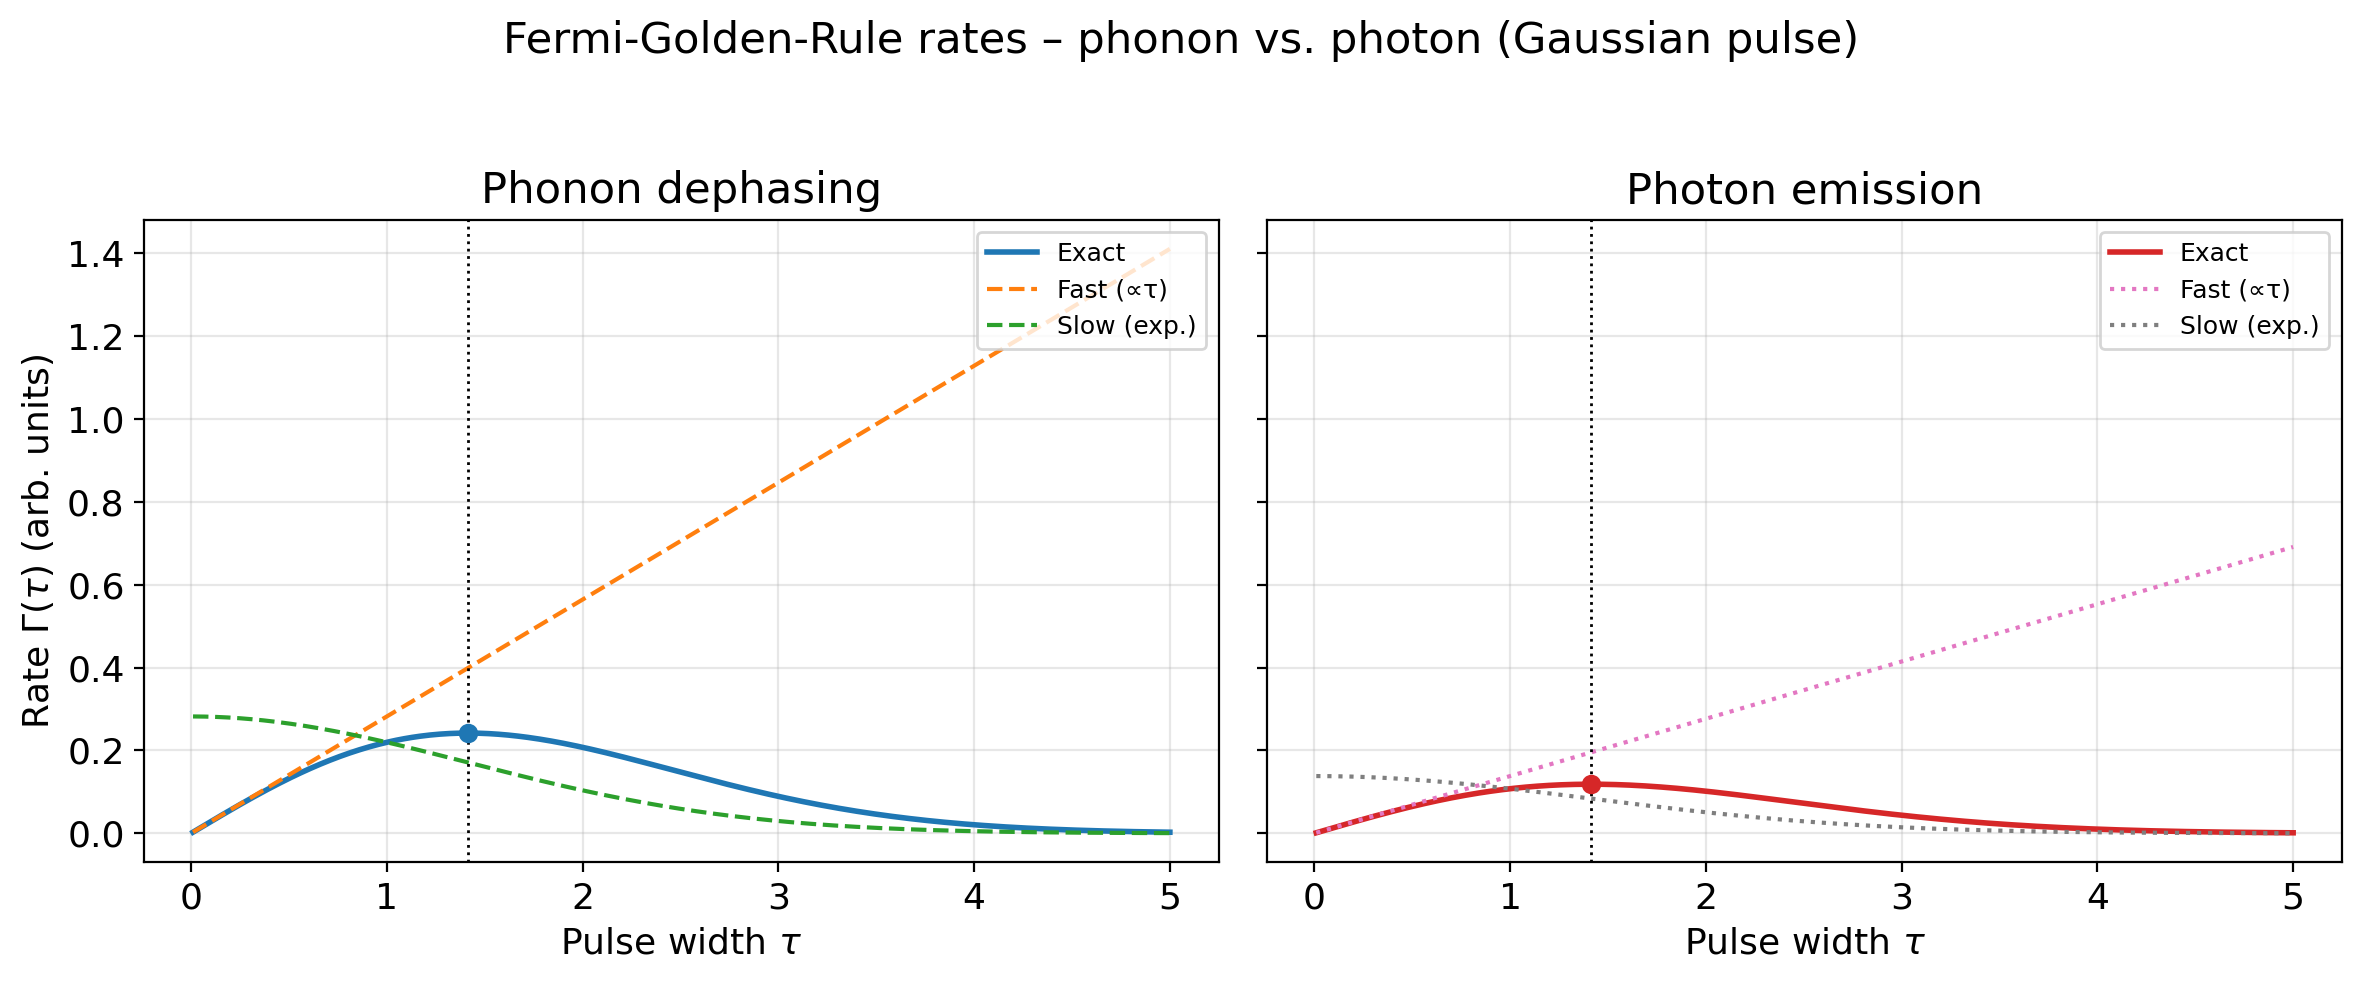

In [19]:
"""Plot FGR rates for phonons and photons in separate sub‑plots.

Both rates are evaluated for a Gaussian perturbation using the
Fermi‑Golden‑Rule expression.  For each process the figure shows

* the exact rate,
* the fast‑pulse (linear) limit,
* the slow‑pulse (exponential‑tail) limit.

The two panels share the y‑axis so the absolute magnitudes can be
compared directly.
"""

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# Plot appearance
# -------------------------------------------------------------
plt.rcParams["figure.dpi"] = 200          # high‑resolution output

# -------------------------------------------------------------
# Physical constants (dimensionless demo values)
# -------------------------------------------------------------
HBAR = 1.0
OMEGA_12 = 1.0

# Coupling strengths for the two processes
V12_PHONON = 1.0
V12_PHOTON = 0.7


def prefactor(V: float) -> float:
    """Return the common front factor ℏ/(2√π)·|V|²."""
    return HBAR / (2 * np.sqrt(np.pi)) * V**2


def gamma_exact(tau: float, V: float) -> float:
    """
    Exact rate Γ(τ) for a Gaussian perturbation.

    The analytic form is

        Γ(τ) = prefactor(V) · τ · exp[−(Ω₁₂·τ)² / 4].

    Args:
        tau: Pulse width (in units of 1/Ω₁₂).
        V:   Coupling strength for the process.

    Returns:
        The transition rate Γ(τ).
    """
    return prefactor(V) * tau * np.exp(-(OMEGA_12 * tau) ** 2 / 4.0)


def gamma_fast(tau: float, V: float) -> float:
    """Fast‑pulse limit (linear in τ)."""
    return prefactor(V) * tau


def gamma_slow(tau: float, V: float) -> float:
    """Slow‑pulse limit – exponential tail only."""
    return prefactor(V) * np.exp(-(OMEGA_12 * tau) ** 2 / 4.0)


def main() -> None:
    """Generate the two‑panel figure."""
    # ---------------------------------------------------------
    # τ grid and optimal width
    # ---------------------------------------------------------
    tau_vals = np.linspace(0.01, 5.0, 500)
    tau_opt = np.sqrt(2) / OMEGA_12          # ≈ √2 / Ω₁₂

    # ---------------------------------------------------------
    # Create a 1 × 2 grid, sharing the y‑axis
    # ---------------------------------------------------------
    fig, (ax_ph, ax_pt) = plt.subplots(
        1, 2, figsize=(12, 5), sharey=True
    )

    # ---------------------------------------------------------
    # Phonon panel
    # ---------------------------------------------------------
    ax_ph.plot(tau_vals, gamma_exact(tau_vals, V12_PHONON),
               label="Exact", color="tab:blue", lw=2)
    ax_ph.plot(tau_vals, gamma_fast(tau_vals, V12_PHONON),
               "--", label="Fast (∝τ)", color="tab:orange", lw=1.5)
    ax_ph.plot(tau_vals, gamma_slow(tau_vals, V12_PHONON),
               "--", label="Slow (exp.)", color="tab:green", lw=1.5)

    ax_ph.axvline(tau_opt, color="k", ls=":", lw=1)
    ax_ph.scatter([tau_opt],
                  [gamma_exact(tau_opt, V12_PHONON)],
                  color="tab:blue", zorder=5)

    ax_ph.set_xlabel(r"Pulse width $\tau$")
    ax_ph.set_title("Phonon dephasing")
    ax_ph.grid(alpha=0.3)

    # ---------------------------------------------------------
    # Photon panel
    # ---------------------------------------------------------
    ax_pt.plot(tau_vals, gamma_exact(tau_vals, V12_PHOTON),
               label="Exact", color="tab:red", lw=2)
    ax_pt.plot(tau_vals, gamma_fast(tau_vals, V12_PHOTON),
               ":", label="Fast (∝τ)", color="tab:pink", lw=1.5)
    ax_pt.plot(tau_vals, gamma_slow(tau_vals, V12_PHOTON),
               ":", label="Slow (exp.)", color="tab:gray", lw=1.5)

    ax_pt.axvline(tau_opt, color="k", ls=":", lw=1)
    ax_pt.scatter([tau_opt],
                  [gamma_exact(tau_opt, V12_PHOTON)],
                  color="tab:red", zorder=5)

    ax_pt.set_xlabel(r"Pulse width $\tau$")
    ax_pt.set_title("Photon emission")
    ax_pt.grid(alpha=0.3)

    # ---------------------------------------------------------
    # Shared elements
    # ---------------------------------------------------------
    fig.suptitle(
        "Fermi‑Golden‑Rule rates – phonon vs. photon (Gaussian pulse)"
    )
    ax_ph.set_ylabel(r"Rate $\Gamma(\tau)$ (arb. units)")

    ax_ph.legend(fontsize=9, loc="upper right")
    ax_pt.legend(fontsize=9, loc="upper right")

    plt.tight_layout(rect=[0, 0, 1, 0.95])   # make room for suptitle
    plt.show()


if __name__ == "__main__":
    main()
